# <center> Εργασία Αριθμητικής Ανάλυσης 2023 </center>
**Ιωάννης Ορθοδόξου ΑΕΜ:10822**

## Παραγοντοποιήσεις LU και QR 
Παραγοντοποίηση LU όπως έχει δοθεί και ο τυχαίος πίνακας A ως παράδειγμα 

In [1]:
import numpy as np

def LUmine(A):
    n = A.shape[0]
    L = np.matrix( np.identity(n) )
    U = A
    for j in range(0,n-1):
        for i in range(j+1,n):
            mult = A[i,j] / A[j,j]
            A[i, j+1:n] = A[i, j+1:n] - mult * A[j,j+1:n]
            U[i, j+1:n] = A[i, j+1:n]
            L[i,j] = mult
            U[i,j] = 0
    return L, U

A = np.matrix([[1,2,1],[3,4,2],[2,5,1.0]])
L, U = LUmine(A.copy())
print("L :\n", L, "\nU :\n", U)

L :
 [[ 1.   0.   0. ]
 [ 3.   1.   0. ]
 [ 2.  -0.5  1. ]] 
U :
 [[ 1.   2.   1. ]
 [ 0.  -2.  -1. ]
 [ 0.   0.  -1.5]]


**Παραγοντοποίηση QR με την μέθοδο Gram-Schmidt με συμπληρωμένα τα κενά** <br>
Οι πίνακες Α 3x3 και Β 2x2 είναι τύχαία παραδείγματα για έλεγχο της ορθότητας της συνάρτησης QRmine.

In [2]:
import numpy as np

def QRmine(A):
    n = A.shape[0]
    Q = np.matrix( np.zeros( (n,n)))
    for j in range(0,n): #εδω
        q = A[:,j]
        for i in range(0,j):  #εδω
            length_of_leg = np.sum( A[:,j].T * Q [:,i])
            q = q - Q[:,i]*length_of_leg  #εδω
        Q[:,j] = q / np.linalg.norm(q)
    R = Q.T * A  #εδω
    return Q, R

A = np.matrix([[1,1,0],[1,0,1],[0,1,1.0]]) 
Q, R = QRmine(A)
print( np.linalg.norm(A - Q*R) )
B = np.matrix([[1,1],[4,3.0]])
Q, R = QRmine(B)
print( np.linalg.norm(B - Q*R) )


6.904111161903604e-16
4.6151104473205536e-15


Τα αποτελέσμα που βγάζει η συνάρτηση np.linalg.norm(A - Q*R) και np.linalg.norm(Β - Q*R)  αντίστοιχα, δεν είναι ακριβώς 0 αλλά κάποιος αριθμός *10^-15 όπου προσεγγιστικά είναι 0 άρα μπορούμε να θεωρήσουμε πώς η συνάρτηση QRmine λειτουργεί σώστα<br><br>
Οι πάρακατω συναρτήσεις solveLUmine και solveQRmine δέχονται ένα τετραγωνικό πίνακα A και ένα διάνυσμα b και επιστρέφουν την λύση του συστήματος Ax=b. Ο υπολογισμός της λύσης γίνεται με χρήση των παραγοντοποιήσεων LU και QR αντίστοιχα. Υπάρχει τυχαίο παράδειγμα για την ορθότητα της λειτουργείας των 2 συναρτήσεων

In [3]:
def solveLUmine(A,b):
    L, U = LUmine(A.copy())
    n = L.shape[0]
    y = np.matrix( np.zeros( (n,1)))
    x = np.matrix( np.zeros( (n,1)))
    for i in range(0,n):
        y[i,0] = b[i,0] / L[i,i]
        for j in range(0,n):
            b[j,0] -=  L[j,i] * y[i,0]
    for i in range(n-1,-1,-1):
        x[i,0] = y[i,0] / U[i,i]
        for j in range(n-1,-1,-1):
            y[j,0] -= U[j,i] * x[i,0]
    return x
    
def solveQRmine(A,b):
    Q, R = QRmine(A.copy())
    n = Q.shape[0]
    y = np.dot(Q.T,b)
    x = np.matrix( np.zeros( (n,1)))
    for i in range(n-1,-1,-1):
        x[i,0] = y[i,0] / R[i,i]
        for j in range(n-1,-1,-1):
            y[j,0] -= R[j,i] * x[i,0]
    return x

B = np.matrix([[3,-4],[6,-10.0]])
p = np.matrix([[5],[2.0]])
print("Η λύση του συστήματος με χρήση της LU:\n",solveLUmine(B.copy(),p.copy()))
print("Η λύση του συστήματος με χρήση της QR:\n",solveQRmine(B.copy(),p.copy()))


Η λύση του συστήματος με χρήση της LU:
 [[7.]
 [4.]]
Η λύση του συστήματος με χρήση της QR:
 [[7.]
 [4.]]


## Πίνακες Hilbert <br>
Ερώτημα α) με τιμές για το n 3 και 5

In [4]:
def Hil(n):
    H = np.matrix( np.zeros( (n,n)))
    for i in range(0,n):
        for j in range(0,n):
            H[i,j] = (1/(i+j+1)) 
    return H

print("Πίνακας Hilbert για n=3\n",Hil(3),"\n\nΠίνακας Hilbert για n=5\n",Hil(5))

Πίνακας Hilbert για n=3
 [[1.         0.5        0.33333333]
 [0.5        0.33333333 0.25      ]
 [0.33333333 0.25       0.2       ]] 

Πίνακας Hilbert για n=5
 [[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]


Ερωτήματα β) και γ) για n=3

In [5]:
def solver(n):
    b = np.ones((n,1))
    H = Hil(n)
    x = solveLUmine(H.copy(),b.copy())
    bnew = b
    bnew[0][0] = b[0][0] + 10**-15
    xnew = solveLUmine(H.copy(),bnew.copy()) 
    return x, xnew

x, xnew = solver(3)
print("Η λύση του αρχίκου συστήματος είναι :\n", x)
print("Η λύση του καινούργιου συστήματος είναι :\n", xnew)
print("Η μέγιστη απόλυτη διαφορά είναι :", np.max(np.abs(x - xnew)))

Η λύση του αρχίκου συστήματος είναι :
 [[  3.]
 [-24.]
 [ 30.]]
Η λύση του καινούργιου συστήματος είναι :
 [[  3.]
 [-24.]
 [ 30.]]
Η μέγιστη απόλυτη διαφορά είναι : 2.1316282072803006e-14


Παρατηρούμε ότι οι λύσεις των δύο συστημάτων φαίνοντε ίδιες αλλά η μέγιστη απόλυτη διαφορά είναι κάποιος πολύ μικρός αριθμός όπως αναμέναμε<br><br>
Ερώτημα δ) για n από 2 μέχρι 10

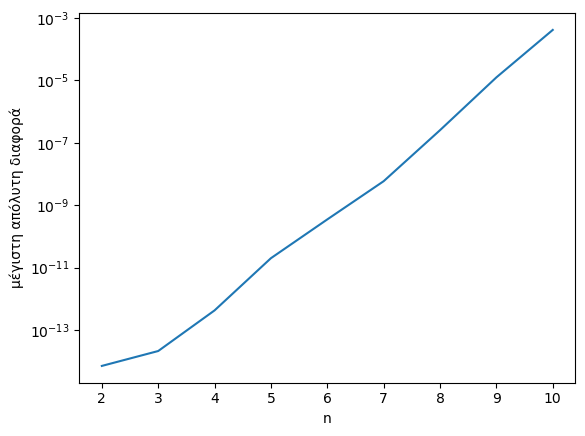

In [6]:
import matplotlib.pyplot as plt

d = 11
yaxis = np.zeros(d-2)
n = np.arange(2,d,1 )
for i in range(2,d):
    x, xnew = solver(i)
    yaxis[i-2] = np.max(np.abs(x - xnew))
    
plt.semilogy(n, yaxis)
plt.xlabel('n')
plt.ylabel('μέγιστη απόλυτη διαφορά')
plt.show()

Το συμπέρασμα που βγάζω για τη λύση του συστήματος Hx = b είναι ότι καθώς αυξάνεται το n, δηλαδή οι διαστάσεις του πίνακα Hilbert, η μέγιστη απόλυτη διαφορά αυξάνεται εκθετικά και άρα αν υπάρχει στο διάνυσμα b ένα στοιχειο που περιέχει κάποια πολύ μικρή τιμή τότε η λύση του συστήματος δεν προσεγγίζει την πραγματική λύση <br><br>
Ερώτημα ε) για n από 2 μέχρι 10

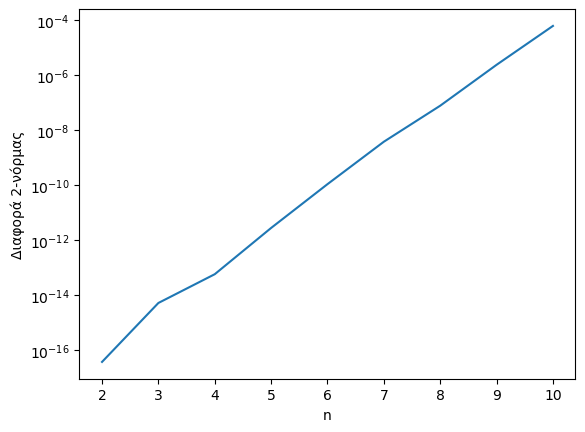

In [7]:
d = 11
norm = np.zeros(d-2)
n = np.arange(2,d,1 )
for i in range(2,d):
    H = Hil(i)
    norm[i-2] = np.linalg.norm(np.identity(i) - H * np.linalg.inv(H),2)
    
plt.semilogy(n, norm)
plt.xlabel('n')
plt.ylabel('Διαφορά 2-νόρμας')
plt.show()

Παρατηρούμε ότι όσο αυξάνεται το n, το σφάλμα για να υπολογιστεί ο μοναδιαίος πίνακας μέσω του γινομένου του Hilbert με τον αντίστροφο του, αυξάνεται εκθετικά. Για την διαδικασία αντιστροφής των πινάκων αυτό σημαίνει ότι δεν γίνεται σωστά και εισάγει κάποιο σφάλμα, το οποίο, όσο μεγαλύτερες είναι οι διαστάσεις του Hilbert τόσο μεγαλύτερο είναι το σφάλμα.  

## Πρόβλημα προσέγγισης<br>
Δημιουργία των διανυσμάτων t και y

In [8]:
t = np.linspace(0, 1, 50)
y = np.cos(4 * t) + 0.1 * np.random.randn(t.shape[0])
y.shape = (50,1)

Τρόπος 1 με παραγοντοποίηση LU

In [9]:
C = np.matrix( [[1.0] * 5] * 50)
for i in range(0,50):
    for j in range(1,5):
        C[i,j] = t[i] ** j
x = solveLUmine( np.dot(C.T,C), np.dot(C.T,y))
zLU = np.matrix(np.zeros((50,1)))
sum1 = 0.0
for i in range(0,50):
    for j in range(0,5):
        zLU[i,0] += x[j,0] * t[i]**j
    sum1 += (zLU[i,0]-y[i,0])**2
print("Το άθροισμα των τετραγωνικών σφαλμάτων "+
      "για την μέθοδο LU είναι :\n",sum1)

Το άθροισμα των τετραγωνικών σφαλμάτων για την μέθοδο LU είναι :
 0.36443782872276687


Τρόπος 2 με παραγοντοποίηση QR

In [10]:
xnew = solveQRmine(np.dot(C.T,C),np.dot(C.T,y)) 
zQR = np.matrix(np.zeros((50,1)))
sum2 = 0.0
for i in range(0,50):
    for j in range(0,5):
        zQR[i,0] += xnew[j,0] * t[i]**j
    sum2 += (zQR[i,0]-y[i,0])**2
print("Το άθροισμα των τετραγωνικών σφαλμάτων "+
      "για την μέθοδο QR είναι :\n",sum2)

print("\nΗ διαφορά των δύο αθροισμάτων είναι :\n",sum1-sum2)

Το άθροισμα των τετραγωνικών σφαλμάτων για την μέθοδο QR είναι :
 0.36443782872283964

Η διαφορά των δύο αθροισμάτων είναι :
 -7.277511926417901e-14


Η διαφορά των δύο αθροισμάτων είναι αρνητική, άρα η παραγοντοποίηση LU έχει μικρότερο σφάλμα και μας δίνει μια καλύτερη προσέγγιση της καμπύλης από την παραγοντοποίση QR.

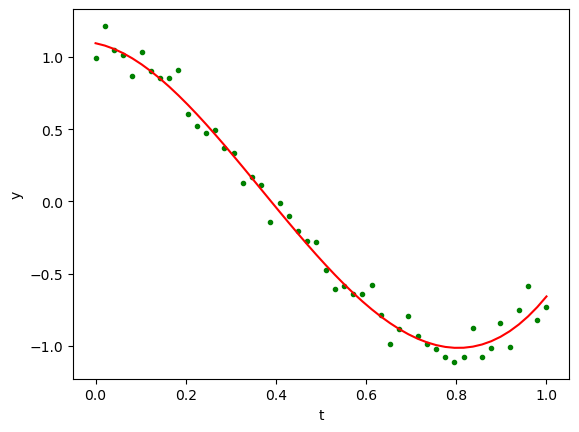

In [11]:
plt.plot(t,y,'g.')
plt.plot(t,zLU,'r')
plt.xlabel("t")
plt.ylabel("y")
plt.show()